[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lacouth/metodos_20191/master)

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Logística</h1>

# <font color='red' style='font-size: 30px;'>Classificando filmes</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>


### Descrição:


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Classificador</b> utilizando a técnica de <b>Regressão Logística</b> para classificar em <b>Bom</b> ou <b>Ruim</b> filmes de acordo com as notas dadas pela crítica especializada e pela audiência geral</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) são fictícios</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>pop</b> Nota entre 0 - 5 dada pela audiência geral</li>
    <li><b>critica</b> - Nota entre 0 - 5 dada pela crítica especializada</li>
    <li><b>bom</b> - Classificação do filme(1 = bom, 0 = ruim )</li>
    
</ul>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

## Leitura dos dados Local ou Binder

In [2]:
filmes = pd.read_csv('../Dados/FilmesAvaliacao.csv')

## Leitura dos dados no Google Colab

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
#filmes = pd.read_csv('FilmesAvaliacao.csv')

## Visualizar os dados

In [5]:
filmes

,pop,critica,bom
0,4,3,1
1,1,2,0
2,0,2,0
3,2,1,0
4,4,1,1
5,0,3,0
6,2,3,1
7,0,1,0
8,2,4,1
9,3,2,1


## Separando as categorias de filmes

In [6]:
bom = filmes['bom'] == 1
ruim = filmes['bom']== 0

## Visualizando a distribuição dos dados

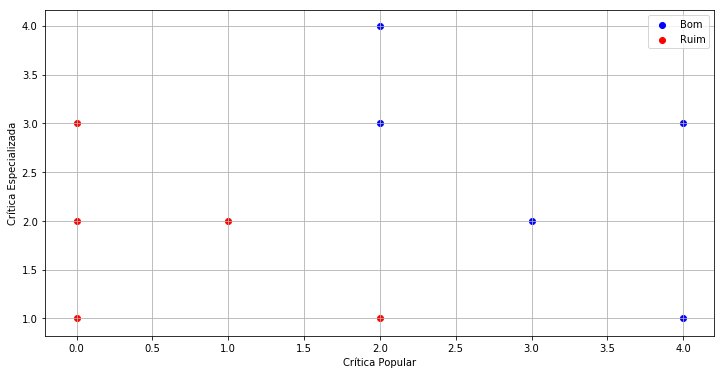

In [7]:

plot.figure(figsize=(12,6))
plot.scatter(filmes[bom]['pop'],filmes[bom]['critica'], c='b')
plot.scatter(filmes[ruim]['pop'],filmes[ruim]['critica'], c='r')
plot.grid(True)
plot.xlabel('Crítica Popular')
plot.ylabel('Crítica Especializada')
plot.legend(['Bom','Ruim'])
plot.show()


## A função sigmóide

Para obtermos os nossos resultado em forma de probalidade precisamos definir a função sigmóide que muda a escala dos dados para valores entre __0__  e **1**

$$\sigma(x) = \frac{1}{1 + \mathrm{e}^{-x}}$$

In [8]:
def sig(x):
    return 1/(1+np.exp(-x))

## O algoritmo da regressão linear

Podemos entender regressão logística como o análogo de regressão linear para problemas de classificação. Esse tipo de problema surge quando queremos categorizar alguma variável por classes. Para obter esses coeficientes fazemos uso do _algoritimo perceptron_ que atualiza os coeficientes de maneira iterativa de acordo com pontos conhecidos.

Para implementar o algoritmo basta seguir os seguintes passos:

1. Definir o máximo de iterações e a taxa de aprendizado (_learning rate_).

2. Iniciar uma reta de separação no formato $ax + by + c = 0$, com os coeficientes aletórios.

3. Durante as iterações:

    3.1 Selecionar um ponto (p,q) aleatório nos dados conhecidos
    
    3.2 Utilizando os coeficientes da reta calcular a classificação do ponto
    
    3.3 Converter o valor calculado em uma probabilidade $ŷ$ utilizando a função sigmóide
    
    3.4 Atualizar os coeficientes de acordo com a equação de atualização logística:
    
      * $ a = a + lr(y_i - ŷ_i)p $
      * $ b = b + lr(y_i - ŷ_i)q $
      * $ c = c + lr(y_i - ŷ_i) $

In [9]:
def regressao_logistica_sig(dados, max_gen=1000, lr = 0.01):
   
    tam = dados.shape[0]
    coef = np.random.randn(3)
    for i in range(max_gen):
        ponto = np.random.randint(0,tam)
        cl = coef[0]*dados.iat[ponto,0] + coef[1]*dados.iat[ponto,1] + coef[2]
        y_ = sig(cl)
        var = lr*(dados.iat[ponto,2] - y_)
        coef[0]+=var*dados.iat[ponto,0]
        coef[1]+=var*dados.iat[ponto,1]
        coef[2]+=var      
    return coef      

### Definindo uma função para traçar a reta de separação

Dados os coeficientes da reta de separação no formato $ax+by+c=0$ para visualizar a reta graficamente basta isolar $y$ e construir a reta para uma série contínua de valores de $x$

In [10]:
def reta(coef,x):
    return (-coef[2]-(coef[0]*x))/coef[1]

## Aplicando a regressão logística

Utilizando os dados da classificação dos filmes é possível construir um modelo de previsão baseado nas notas dadas pela crítica e pelo público geral

In [11]:
coef = regressao_logistica_sig(filmes,5000,0.1)

## Apresentando o resultado de forma gráfica

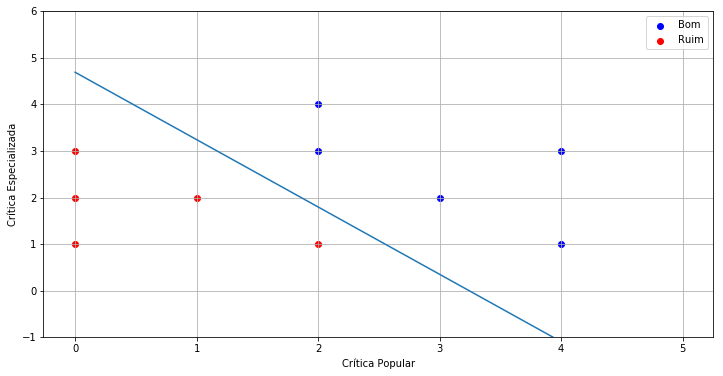

In [12]:

x = np.linspace(0,5,100)
y = reta(coef,x)
plot.figure(figsize=(12,6))
plot.scatter(filmes[bom]['pop'],filmes[bom]['critica'], c='b')
plot.scatter(filmes[ruim]['pop'],filmes[ruim]['critica'], c='r')
plot.grid(True)
plot.grid(True)
plot.xlabel('Crítica Popular')
plot.ylabel('Crítica Especializada')
plot.legend(['Bom','Ruim'])
plot.plot(x,y)
plot.ylim(-1,6)
plot.show()

## Definindo uma função para classificar novos dados

In [13]:
def previsao(coef,entrada):
    x = coef[0]*entrada[0]+coef[1]*entrada[1] + coef[2]
    prob = sig(x)
    return prob

In [14]:
critica_pop = 3
critica_esp = 2
entrada = [critica_pop,critica_esp]

prob = previsao(coef,entrada)
print('O filme tem {:.2f}% de probabilidade de ser bom'.format(prob*100))


O filme tem 97.69% de probabilidade de ser bom


# <font color='red' style='font-size: 30px;'>Classificando Alunos</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>


### Descrição:


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Classificador</b> utilizando a técnica de <b>Regressão Logística</b> para classificar em <b>Aprovado</b> ou <b>Reprovado</b> candidatos de um concurso de acordo com a nota de um teste e o seu CRA.

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) são fictícios</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>cra</b> - Nota entre 0 - 100</li>
    <li><b>teste</b> - Nota entre 0 - 100 obtida pelo aluno no teste de admissão</li>
    <li><b>aprovado</b> - Situação do aluno no final do processo seletivo(1 = aprovado, 0 = reprovado)</li>
    
</ul>

## Leitura de dados local

In [15]:
dados = pd.read_csv("../Dados/notas_alunos.csv", sep=',')

## Leitura dos dados no Google Colab

In [16]:
# from google.colab import files
# uploaded = files.upload()

In [17]:
#filmes = pd.read_csv('notas_alunos.csv')

## Visualizando os dados

In [18]:
dados

,cra,teste,aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [19]:
pos, neg = dados['aprovado'] == 1, dados['aprovado'] == 0

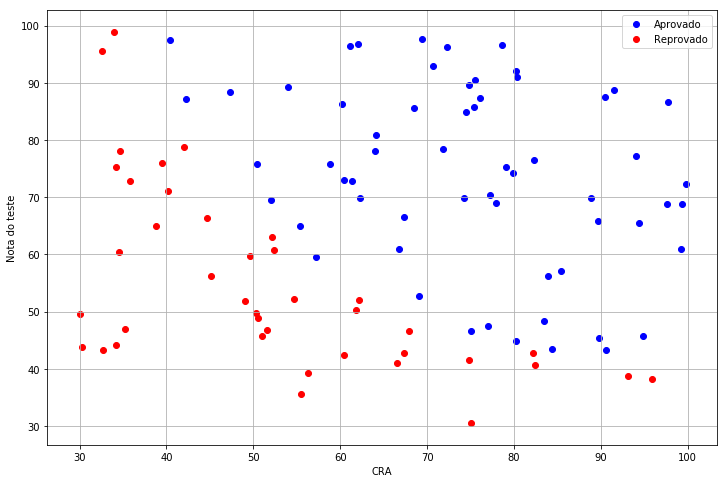

In [20]:

plot.figure(figsize=(12,8))
plot.scatter(dados[pos]['cra'],dados[pos]['teste'],c='b')
plot.scatter(dados[neg]['cra'],dados[neg]['teste'],c='r')
plot.grid(True)
plot.xlabel("CRA")
plot.ylabel("Nota do teste")
plot.legend(["Aprovado" , "Reprovado"])
plot.show()


In [30]:
%%time
coef_aluno = regressao_logistica_sig(dados,2000000,0.0005)

CPU times: user 1min 52s, sys: 0 ns, total: 1min 52s
Wall time: 1min 52s


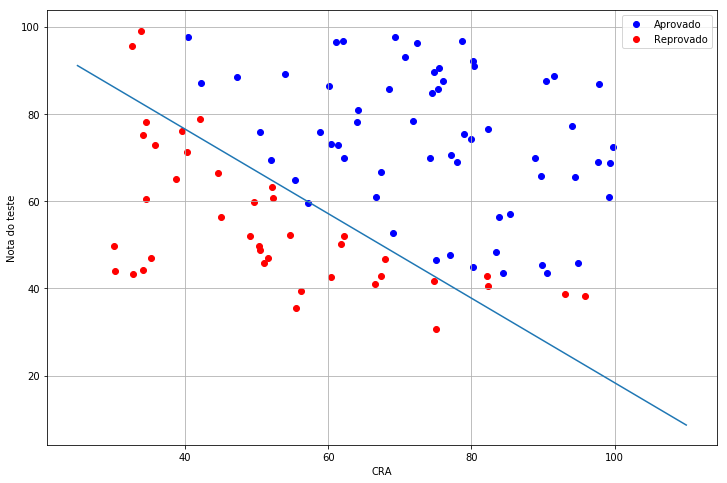

In [34]:
x = np.linspace(25,110.0,100)
y = reta(coef_aluno,x)
plot.figure(figsize=(12,8))
plot.scatter(dados[pos]['cra'],dados[pos]['teste'],c='b')
plot.scatter(dados[neg]['cra'],dados[neg]['teste'],c='r')



plot.grid(True)
plot.xlabel("CRA")
plot.ylabel("Nota do teste")
plot.legend(["Aprovado" , "Reprovado"])

plot.plot(x,y)
plot.show()

## Definindo um simulador

In [32]:
CRA = 90
teste = 80
entrada = [CRA, teste]

prob = previsao(coef_aluno,entrada)
print('O aluno tem {:.2f}% de probabilidade de ser aprovado'.format(prob*100))

O aluno tem 99.98% de probabilidade de ser aprovado


## Utilizando o scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>

## Importando o modelo de regressão linear

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [24]:
from sklearn.linear_model import LogisticRegression

### Criando o modelo

In [38]:
modelo = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)

## Treinando o modelo com os dados

In [39]:
modelo.fit(dados[['cra','teste']], dados['aprovado'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Obtendo os coeficientes da reta de separação

In [40]:
coef_sk = [modelo.coef_[0,0],modelo.coef_[0,1],modelo.intercept_[0]]
coef_sk

[0.0384448155548829, 0.03101854556290881, -3.899777944704759]

## Gerando o resultado gráfico

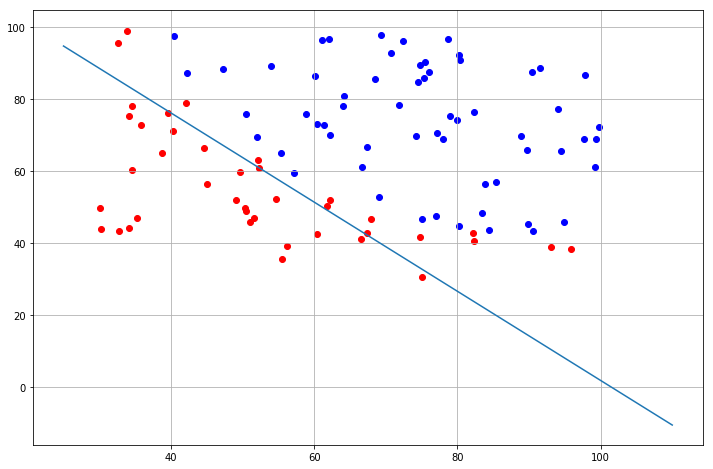

In [41]:
x = np.linspace(25,110.0,100)
y = reta(coef_sk,x)
plot.figure(figsize=(12,8))
plot.scatter(dados[pos]['cra'],dados[pos]['teste'],c='b')
plot.scatter(dados[neg]['cra'],dados[neg]['teste'],c='r')
plot.plot(x,y)
plot.grid(True)
plot.show()

## Simulando com os parâmetros obtidos pelo scikit-learn

In [42]:
cra = 90
teste = 80
entrada = [cra, teste]

prob = previsao(coef_sk,entrada)
print('O aluno tem {:.2f}% de probabilidade de ser aprovado'.format(prob*100))

O aluno tem 88.51% de probabilidade de ser aprovado


## Limitações da Regressão Linear

Quanto às limitações, existem duas que merecem destaque. A primeira é que nem regressão logística e nem o _perceptron_ conseguem achar a fronteira de separação entre as classes se essa fronteira não for uma reta. Essa limitação vem do fato desses modelos serem lineares. 

A segunda limitação é que regressão logística e perceptrons acham apenas alguma reta de separação entre as classes, mas não é garantido que eles encontrem a melhor reta de separação. Como exemplo, veja a imagem a seguir:

<img src="separateplane.png" width="35%"/>

Temos duas classes, azul e vermelha, que gostaríamos de separar. Isso pode ser feito por qualquer uma das linhas abaixo. Nossa intuição diz que a linha amarela é a melhor dentre as três, mas nada garante que a regressão logística ou o perceptron encontrarão a melhor linha separadora. Na verdade, é muito mais provável que eles encontrem uma linha não ótima, pois o treinamento normalmente é interrompido pelo número de iterações. Para achar a melhor linha, precisaremos de um outro algoritmo: as máquinas de suporte vetorial (__SVM__).